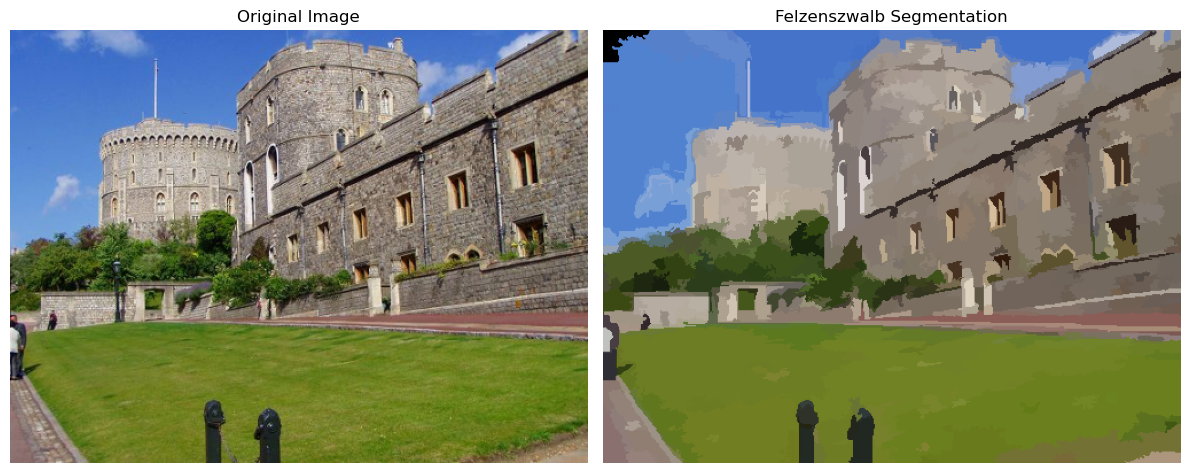

In [8]:
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb
from skimage import io, color

# Load image
target_image_path = 'refrence-targets/reference2.png'
image = io.imread(target_image_path)

# Segment image into superpixels using Felzenszwalb's method
segments_fz = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)

# Display the original image and the segmented image
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(color.label2rgb(segments_fz, image, kind='avg'))
ax[1].set_title('Felzenszwalb Segmentation')
ax[1].axis('off')

plt.tight_layout()
plt.show()

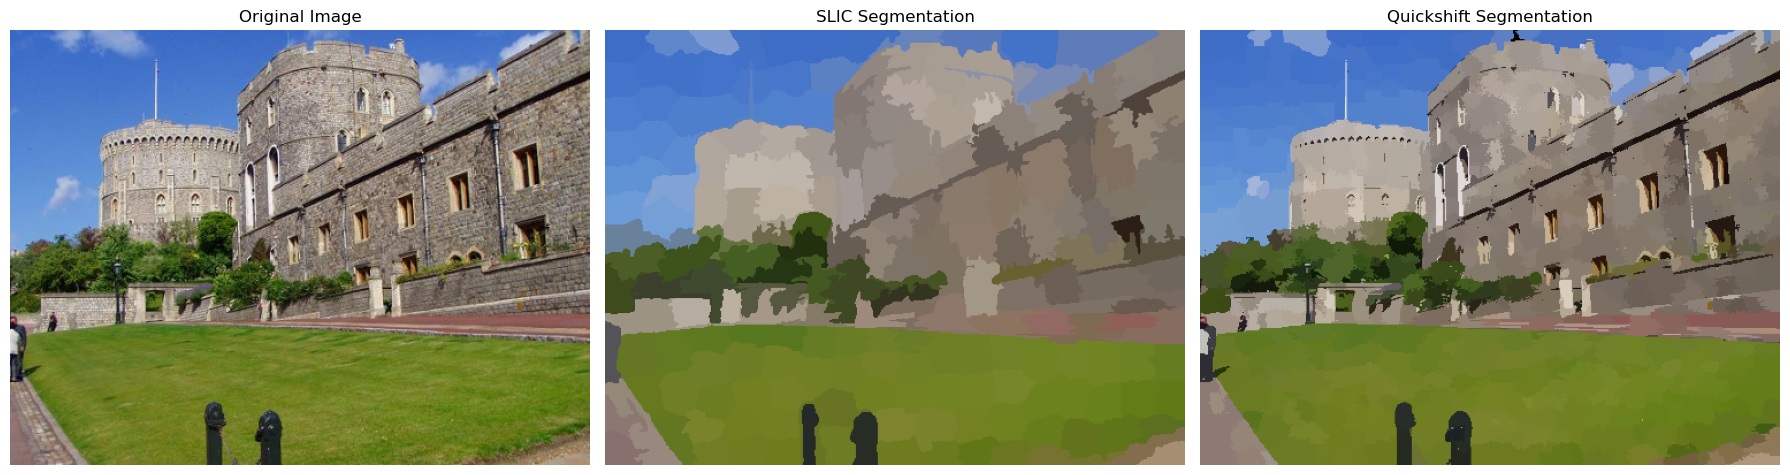

In [10]:
import matplotlib.pyplot as plt
from skimage.segmentation import slic, quickshift
from skimage import io, color

# Load image
target_image_path = 'refrence-targets/reference2.png'
image = io.imread(target_image_path)

# Segment image into superpixels using SLIC method
segments_slic = slic(image, n_segments=250, compactness=10, sigma=1, start_label=1)

# Segment image into superpixels using Quickshift method
segments_quickshift = quickshift(image, kernel_size=3, max_dist=6, ratio=0.5)

# Display the original image and the segmented images
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(color.label2rgb(segments_slic, image, kind='avg'))
ax[1].set_title('SLIC Segmentation')
ax[1].axis('off')

ax[2].imshow(color.label2rgb(segments_quickshift, image, kind='avg'))
ax[2].set_title('Quickshift Segmentation')
ax[2].axis('off')

plt.tight_layout()
plt.show()

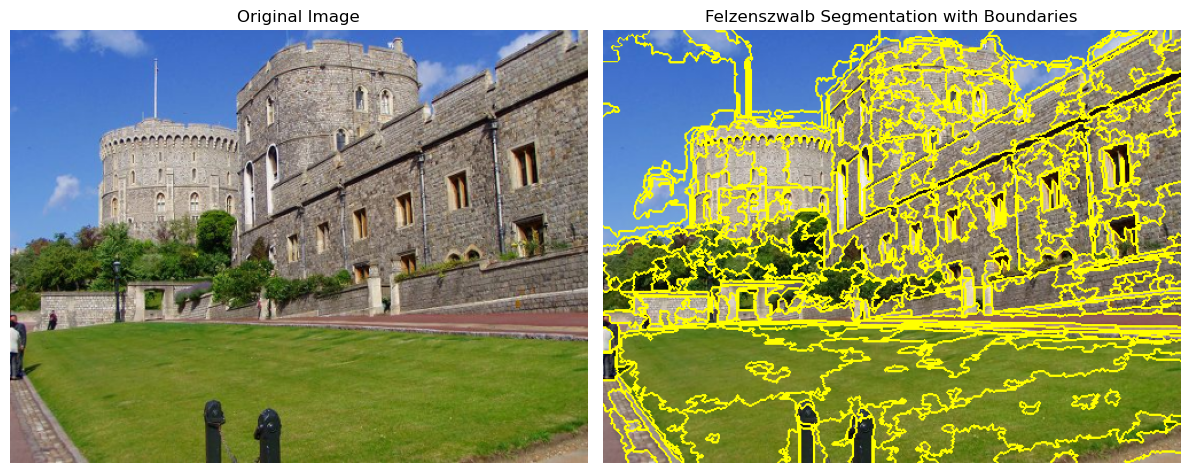

In [11]:
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb, mark_boundaries
from skimage import io, color

# Load image
target_image_path = 'refrence-targets/reference2.png'
image = io.imread(target_image_path)

# Segment image into superpixels using Felzenszwalb's method
segments_fz = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)

# Display the original image and the segmented image with boundaries
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(mark_boundaries(image, segments_fz))
ax[1].set_title('Felzenszwalb Segmentation with Boundaries')
ax[1].axis('off')

plt.tight_layout()
plt.show()

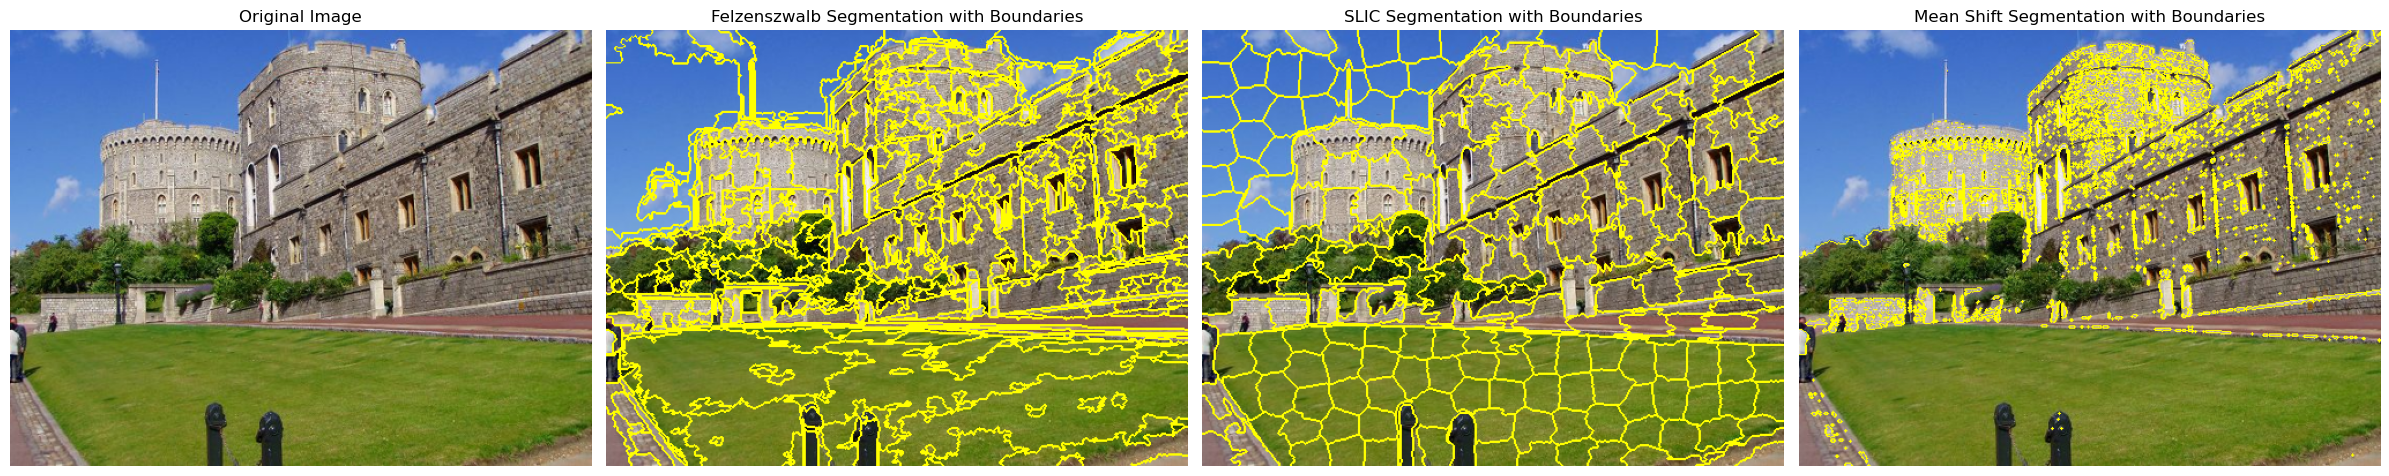

In [12]:
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb, slic, mark_boundaries
from skimage import io, color
from sklearn.cluster import MeanShift
import numpy as np

# Load image
target_image_path = 'refrence-targets/reference2.png'
image = io.imread(target_image_path)

# Segment image into superpixels using Felzenszwalb's method
segments_fz = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)

# Segment image into superpixels using SLIC method
segments_slic = slic(image, n_segments=250, compactness=10, sigma=1, start_label=1)

# Segment image into superpixels using Mean Shift method
# Reshape the image to a 2D array of pixels
flat_image = np.reshape(image, [-1, 3])
# Perform Mean Shift clustering
ms = MeanShift(bin_seeding=True)
ms.fit(flat_image)
labels = ms.labels_
# Reshape the labels to the original image shape
segments_ms = np.reshape(labels, image.shape[:2])

# Display the original image and the segmented images with boundaries
fig, ax = plt.subplots(1, 4, figsize=(24, 6), sharex=True, sharey=True)

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(mark_boundaries(image, segments_fz))
ax[1].set_title('Felzenszwalb Segmentation with Boundaries')
ax[1].axis('off')

ax[2].imshow(mark_boundaries(image, segments_slic))
ax[2].set_title('SLIC Segmentation with Boundaries')
ax[2].axis('off')

ax[3].imshow(mark_boundaries(image, segments_ms))
ax[3].set_title('Mean Shift Segmentation with Boundaries')
ax[3].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from skimage.segmentation import felzenszwalb, slic, mark_boundaries
from skimage import io, color
from sklearn.cluster import MeanShift
import numpy as np

# Load image
target_image_path = 'refrence-targets/reference2.png'
image = io.imread(target_image_path)

# Apply Felzenszwalb Superpixel Segmentation
segments_fz = felzenszwalb(image, scale=100, sigma=0.5, min_size=50)

# Apply SLIC Superpixel Segmentation
height, width = image.shape[:2]
num_segments = (height * width) // 200
segments_slic = slic(image, n_segments=num_segments, compactness=10, sigma=1, start_label=0)

# Apply Mean Shift Superpixel Segmentation
# Reshape the image to a 2D array of pixels
flat_image = np.reshape(image, [-1, 3])
# Perform Mean Shift clustering
ms = MeanShift(bin_seeding=True)
ms.fit(flat_image)
labels = ms.labels_
# Reshape the labels to the original image shape
segments_ms = np.reshape(labels, image.shape[:2])

# Display Superpixel Boundaries
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(mark_boundaries(image, segments_fz, color=(1, 0, 0)))
ax[0].set_title("Felzenszwalb Superpixels")
ax[0].axis('off')

ax[1].imshow(mark_boundaries(image, segments_slic, color=(1, 0, 0)))
ax[1].set_title("SLIC Superpixels")
ax[1].axis('off')

ax[2].imshow(mark_boundaries(image, segments_ms, color=(1, 0, 0)))
ax[2].set_title("Mean Shift Superpixels")
ax[2].axis('off')

plt.tight_layout()
plt.show()